# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

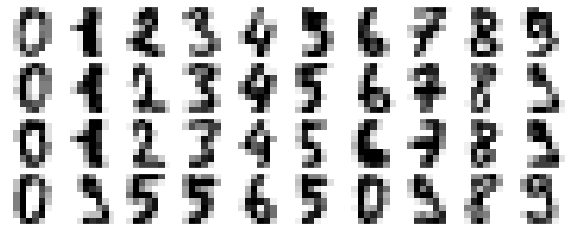

In [7]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)



Number of components needed for 80%:  12


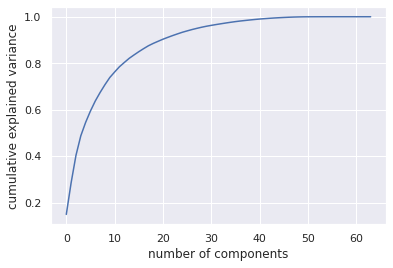

In [13]:
#Calculate number of components needed and plot
pca = PCA().fit(digits.data)
evr = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a)
print("Number of components needed for 80%: ",round( np.interp(0.80, evr, np.arange(64))))

In [10]:
pca = PCA(n_components=0.8)

#Linear
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=42)
linear_svc = SVC(kernel='linear')
linear_model = make_pipeline(pca, linear_svc)

linear = RandomizedSearchCV(estimator = linear_model, param_distributions={'svc__C': [1, 10, 100, 1000]},n_iter=4,n_jobs=4, cv=5)
linear.fit(Xtrain, ytrain)
linear_accuracy = linear.score(Xtest, ytest)

print("Linear accuracy: ", linear_accuracy)
print("Linear best parameters: ", linear.best_params_)

#RBF
rbf_svc = SVC(kernel='rbf')
rbf_model = make_pipeline(pca, rbf_svc)

rbf = RandomizedSearchCV(estimator = rbf_model, param_distributions={'svc__C': [1, 10, 100, 100], 'svc__gamma': [0.1, 0.01, 0.001, 0.0001]},n_jobs=4, cv=5)
rbf.fit(Xtrain, ytrain)
rbf_accuracy = rbf.score(Xtest, ytest)

print("RBF accuracy: ", rbf_accuracy)
print("RBF best parameters: ", rbf.best_params_)

poly_svc = SVC(kernel='poly')
poly_model = make_pipeline(pca, poly_svc)

#Poly
poly = RandomizedSearchCV(estimator = poly_model, param_distributions={'svc__C': [1, 10, 100, 100], 'svc__degree': [1, 2, 3, 4]},n_jobs=4, cv=5)
poly.fit(Xtrain, ytrain)
poly_accuracy = poly.score(Xtest, ytest)

# Print the best parameters and the best score
print("Polynomial accuracy: ", poly_accuracy)
print("Polynomial best parameters: ", poly.best_params_)


Linear accuracy:  0.9577777777777777
Linear best parameters:  {'svc__C': 1000}
RBF accuracy:  0.9822222222222222
RBF best parameters:  {'svc__gamma': 0.001, 'svc__C': 100}
Polynomial accuracy:  0.9755555555555555
Polynomial best parameters:  {'svc__degree': 3, 'svc__C': 100}
